In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
df_raw = pd.read_csv('AirlineTweets.csv')

In [164]:
df_raw.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [165]:
df = df_raw[['airline_sentiment', 'text']].copy()

In [166]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [167]:
y = df.iloc[:, 0].values

In [168]:
print(y)

['neutral' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']


In [169]:
from sklearn.model_selection import train_test_split
dfTrain, dfTest, Ytrain_uncoded, Ytest_uncoded = train_test_split(df['text'], y, test_size = 0.25, random_state = 0)

In [170]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# featurizer = CountVectorizer(decode_error = 'ignore')
featurizer = TfidfVectorizer(max_features = 2000)
Xtrain = featurizer.fit_transform(dfTrain)
Xtest = featurizer.transform(dfTest)

In [171]:
print(Xtrain)

  (0, 733)	0.20006642548289533
  (0, 320)	0.16719757591213494
  (0, 1250)	0.1955352699048758
  (0, 1253)	0.21667476595123925
  (0, 1895)	0.15273696935461412
  (0, 725)	0.11284614078412891
  (0, 629)	0.32948973490994743
  (0, 1187)	0.12092204654988316
  (0, 1939)	0.1931645103464165
  (0, 1694)	0.24833824876530247
  (0, 1216)	0.15012593016256504
  (0, 1987)	0.23271763866199519
  (0, 669)	0.325514989982451
  (0, 104)	0.2037533818427227
  (0, 491)	0.23554946489396636
  (0, 1173)	0.25012988034329003
  (0, 1733)	0.29071629068117
  (0, 755)	0.10973312126949854
  (0, 1533)	0.301052115503485
  (0, 137)	0.20733261997374308
  (0, 1634)	0.12730971673212998
  (1, 1729)	0.1798306637947903
  (1, 831)	0.20310566750980977
  (1, 1992)	0.2044017711174521
  (1, 1949)	0.14305536616444048
  :	:
  (10978, 1067)	0.4642486503868147
  (10978, 154)	0.3894077309037251
  (10978, 169)	0.5476986760300079
  (10978, 559)	0.2983820085408144
  (10978, 743)	0.36793778428457175
  (10978, 1860)	0.20443449745883707
  (10978

In [172]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ytrain = le.fit_transform(Ytrain_uncoded)
Ytest = le.transform(Ytest_uncoded)

In [173]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain, Ytrain)

LogisticRegression()

In [174]:
y_pred = classifier.predict(Xtest)

In [175]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), Ytest.reshape(len(Ytest), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 2]
 [2 2]
 [0 0]]


In [176]:
print("Train Accuracy : ", classifier.score(Xtrain, Ytrain))
print("Test Accuracy  : ", classifier.score(Xtest, Ytest))

Train Accuracy :  0.8578324225865209
Test Accuracy  :  0.8051912568306011


In [177]:
from sklearn.metrics import f1_score

Ptrain = classifier.predict(Xtrain)
Ptest = classifier.predict(Xtest)
print("Train F1 score : ", f1_score(Ytrain, Ptrain, average = 'weighted'))
print("Test F1 score  : ", f1_score(Ytest, Ptest, average = 'weighted'))

Train F1 score :  0.8521508007300032
Test F1 score  :  0.7967164867418381


In [178]:
from sklearn.metrics import roc_auc_score


Ptrain_proba = classifier.predict_proba(Xtrain)
Ptest_proba = classifier.predict_proba(Xtest)
print("Train AUC : ", roc_auc_score(Ytrain, Ptrain_proba, multi_class = 'ovo'))
print("Test AUC  : ", roc_auc_score(Ytest, Ptest_proba, multi_class = 'ovo'))

Train AUC :  0.9443501518329153
Test AUC  :  0.8903165763351121


In [179]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(Ytrain, Ptrain, normalize = 'true')
cm_test = confusion_matrix(Ytest, Ptest, normalize = 'true')

In [180]:
import seaborn as sn

def plot_cm(cm):
    classes = ['negative', 'positive', 'neutral']
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    ax = sn.heatmap(df_cm, annot = True, fmt = 'g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

Confusion Metrix (train set) : 
 [[0.96409283 0.028463   0.00744417]
 [0.29866781 0.65105286 0.05027933]
 [0.18257492 0.09655938 0.7208657 ]]


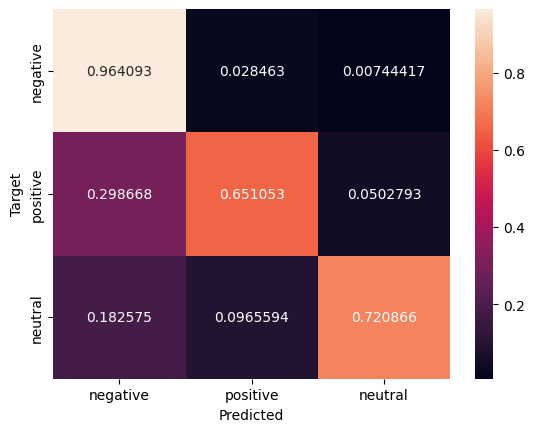

In [181]:
print("Confusion Metrix (train set) : \n", cm_train)
plot_cm(cm_train)

Confusion Metrix (test set) : 
 [[0.93253116 0.05457671 0.01289214]
 [0.38471503 0.55699482 0.05829016]
 [0.25311943 0.12834225 0.61853832]]


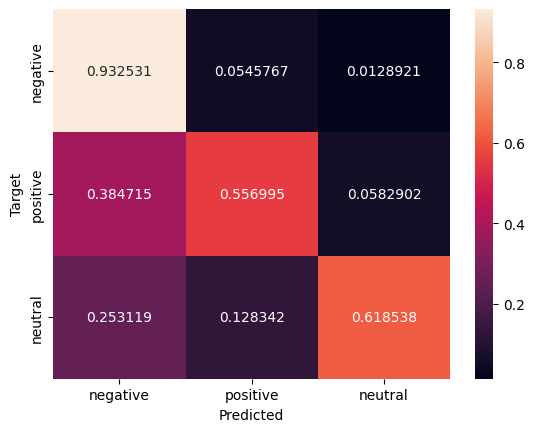

In [182]:
print("Confusion Metrix (test set) : \n", cm_test)
plot_cm(cm_test)